In [2]:
import pandas as pd #load and manipulate data and for one-hot encoding
import numpy as numpy # calculate the mean and standard deviation
import xgboost as xgb #contains both XGBClassifier and XGBRegressor
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix


In [3]:
from xgboost import XGBClassifier

In [4]:
#데이터 다운로드
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\df.xlsx') 

In [5]:
#불필요한 열 삭제
df.drop(['loco'],axis=1,inplace=True)
df.drop(['ID'],axis=1,inplace=True)

#일부 데이터 정수형변환
df['JEJU']=df['JEJU'].astype(int)
df['KYUNG_S']=df['KYUNG_S'].astype(int)
df['KYUNG_N']=df['KYUNG_N'].astype(int)
df['JEON_S']=df['JEON_S'].astype(int)
df['JEON_N']=df['JEON_N'].astype(int)
df['CHOONG_S']=df['CHOONG_S'].astype(int)
df['CHOONG_N']=df['CHOONG_N'].astype(int)
df['GANGWON']=df['GANGWON'].astype(int)
df['KYUNGGI']=df['KYUNGGI'].astype(int)
df['SEJONG']=df['SEJONG'].astype(int)
df['ULSAN']=df['ULSAN'].astype(int)
df['DAEJEON']=df['DAEJEON'].astype(int)
df['GWANGJU']=df['GWANGJU'].astype(int)
df['INCHEON']=df['INCHEON'].astype(int)
df['DAEGU']=df['DAEGU'].astype(int)
df['BUSAN']=df['BUSAN'].astype(int)
df['SEOUL']=df['SEOUL'].astype(int)


#데이터 구성요소확인
df['pre_food'].unique()

In [8]:
#결측치 처리
df=df.fillna(0)

#결측치 처리 확인(multi-hot encoding)
df['pre_food'].unique()

array([0., 2.])

In [9]:
#결측치 처리 후 데이터 타입 확인(XGBoost 는 정수, 실수, 불리안형으로 데이터셋이 존재해야함)
df['pre_food'].dtypes

dtype('float64')

In [10]:
#처리된 데이터 확인
df.head(10)

,visit_count,visit_acq,SMONTH,SDAY,EMONTH,EDAY,stay,COST,NUM,per_COST,...,SEJONG,KYUNGGI,GANGWON,CHOONG_N,CHOONG_S,JEON_N,JEON_S,KYUNG_N,KYUNG_S,JEJU
0,4,1,8,10,8,11,1,100000.0,1,100000.0,...,0,0,0,0,0,1,0,3,0,0
1,3,1,5,5,5,6,1,250000.0,1,250000.0,...,0,1,1,0,0,0,0,0,0,0
2,3,1,3,1,3,1,0,50001.0,3,16667.0,...,0,0,0,0,2,1,0,0,0,0
3,3,1,11,16,11,17,1,120000.0,1,120000.0,...,0,0,0,0,0,0,0,0,1,1
4,2,1,8,15,8,17,2,350001.0,3,116667.0,...,0,0,1,0,0,0,1,0,0,0
5,2,1,10,12,10,12,0,120000.0,4,30000.0,...,0,2,0,0,0,0,0,0,0,0
6,2,1,1,4,1,4,0,99999.0,3,33333.0,...,0,2,0,0,0,0,0,0,0,0
7,2,1,3,9,3,9,0,180000.0,3,60000.0,...,0,1,0,1,0,0,0,0,0,0
8,2,1,1,12,1,13,1,150000.0,1,150000.0,...,0,0,2,0,0,0,0,0,0,0
9,2,1,4,14,4,14,0,85000.0,2,42500.0,...,0,2,0,0,0,0,0,0,0,0


In [11]:
#정제된 데이터 행갯수
df.index

RangeIndex(start=0, stop=10503, step=1)

In [12]:
#정제된 데이터 열 갯수
df.columns

Index(['visit_count', 'visit_acq', 'SMONTH', 'SDAY', 'EMONTH', 'EDAY', 'stay',
       'COST', 'NUM', 'per_COST',
       ...
       'SEJONG', 'KYUNGGI', 'GANGWON', 'CHOONG_N', 'CHOONG_S', 'JEON_N',
       'JEON_S', 'KYUNG_N', 'KYUNG_S', 'JEJU'],
      dtype='object', length=133)

In [13]:
#정제된 데이터 리스트
df.values

array([[4., 1., 8., ..., 3., 0., 0.],
       [3., 1., 5., ..., 0., 0., 0.],
       [3., 1., 3., ..., 0., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 2., ..., 0., 0., 0.],
       [1., 2., 2., ..., 0., 0., 0.]])

In [14]:
#데이터 특정 열 확인
df.filter(['SEOUL','ULSAN'])

,SEOUL,ULSAN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10498,0,0
10499,0,0
10500,0,0
10501,0,0


In [15]:
all_float = all([col_type == numpy.dtype('float') for col_type in df.dtypes])
if not all_float:
    df = df.astype('float')

In [16]:
#dft = df.T
#dft[:15]

In [16]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

#point2 = point >= 15
#(point2.values==True).sum()

#point2 = point >= 14
#(point2.values==True).sum()

#point2 = point >= 13
#(point2.values==True).sum()

point2 = point >= 12
(point2.values==True).sum()

#point2 = point >= 11
#(point2.values==True).sum()

#point2 = point >= 10
#(point2.values==True).sum()

7852

In [17]:
#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

,visit_count,visit_acq,SMONTH,SDAY,EMONTH,EDAY,stay,COST,NUM,per_COST,...,SEJONG,KYUNGGI,GANGWON,CHOONG_N,CHOONG_S,JEON_N,JEON_S,KYUNG_N,KYUNG_S,JEJU
0,4,1,8,10,8,11,1,100000.0,1,100000.0,...,0,0,0,0,0,1,0,3,0,0
1,3,1,5,5,5,6,1,250000.0,1,250000.0,...,0,1,1,0,0,0,0,0,0,0
2,3,1,3,1,3,1,0,50001.0,3,16667.0,...,0,0,0,0,2,1,0,0,0,0
3,3,1,11,16,11,17,1,120000.0,1,120000.0,...,0,0,0,0,0,0,0,0,1,1
4,2,1,8,15,8,17,2,350001.0,3,116667.0,...,0,0,1,0,0,0,1,0,0,0


In [19]:
#타겟변수 분포 확인
sum(point2)/len(point2)

0.747595924973817

In [21]:
#훈련용 데이터셋, 시험 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)
#훈련용 데이터셋 타겟변수 분포 확인
sum(y_train)/len(y_train)

0.7476196521518345

In [22]:
#시험 데이터셋 타겟변수 분포 확인
sum(y_test)/len(y_test)

0.7475247524752475

In [23]:
#모델링(기준:'mae')
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='mae',
           eval_set=[(X_test, y_test)])

[0]	validation_0-mae:0.41405
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:0.35591
[2]	validation_0-mae:0.31403
[3]	validation_0-mae:0.28418
[4]	validation_0-mae:0.26171
[5]	validation_0-mae:0.24619
[6]	validation_0-mae:0.23469
[7]	validation_0-mae:0.22617
[8]	validation_0-mae:0.21927
[9]	validation_0-mae:0.21479
[10]	validation_0-mae:0.21127
[11]	validation_0-mae:0.20847
[12]	validation_0-mae:0.20640
[13]	validation_0-mae:0.20444
[14]	validation_0-mae:0.20347
[15]	validation_0-mae:0.20220
[16]	validation_0-mae:0.20091
[17]	validation_0-mae:0.19963
[18]	validation_0-mae:0.19914
[19]	validation_0-mae:0.19830
[20]	validation_0-mae:0.19764
[21]	validation_0-mae:0.19728
[22]	validation_0-mae:0.19692
[23]	validation_0-mae:0.19671
[24]	validation_0-mae:0.19653
[25]	validation_0-mae:0.19450
[26]	validation_0-mae:0.19383
[27]	validation_0-mae:0.19342
[28]	validation_0-mae:0.19323
[29]	validation_0-mae:0.19302
[30]	validation_0-mae:0.19248
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

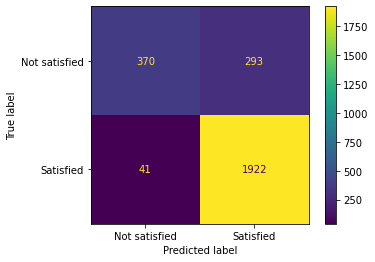

In [24]:
#모델 시각화(by.confusion matrix)
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])

In [25]:
#모델링(기준:'AUC')
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.89005
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.90335
[2]	validation_0-aucpr:0.90453
[3]	validation_0-aucpr:0.90526
[4]	validation_0-aucpr:0.91366
[5]	validation_0-aucpr:0.91198
[6]	validation_0-aucpr:0.91500
[7]	validation_0-aucpr:0.91685
[8]	validation_0-aucpr:0.91876
[9]	validation_0-aucpr:0.91622
[10]	validation_0-aucpr:0.91799
[11]	validation_0-aucpr:0.91947
[12]	validation_0-aucpr:0.91910
[13]	validation_0-aucpr:0.92215
[14]	validation_0-aucpr:0.92291
[15]	validation_0-aucpr:0.92202
[16]	validation_0-aucpr:0.92147
[17]	validation_0-aucpr:0.92237
[18]	validation_0-aucpr:0.92215
[19]	validation_0-aucpr:0.92273
[20]	validation_0-aucpr:0.92254
[21]	validation_0-aucpr:0.92122
[22]	validation_0-aucpr:0.92200
[23]	validation_0-aucpr:0.91994
[24]	validation_0-aucpr:0.92079
Stopping. Best iteration:
[14]	validation_0-aucpr:0.92291



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

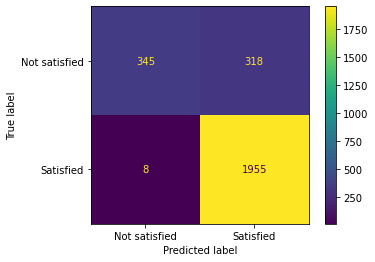

In [26]:
#모델 시각화(by.confusion matrix)
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])

In [28]:
clf_xgb = xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[18:57:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.85833
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.88055
[2]	validation_0-aucpr:0.88144
[3]	validation_0-aucpr:0.88621
[4]	validation_0-aucpr:0.88679
[5]	validation_0-aucpr:0.89834
[6]	validation_0-aucpr:0.90510
[7]	validation_0-aucpr:0.91021
[8]	validation_0-aucpr:0.90685
[9]	validation_0-aucpr:0.90828
[10]	validation_0-aucpr:0.90937
[11]	validation_0-aucpr:0.90823
[12]	validation_0-aucpr:0.91286
[13]	validation_0-aucpr:0.91292
[14]	validation_0-aucpr:0.91038
[15]	validation_0-aucpr:0.91500
[16]	validation_0-aucpr:0.91202
[17]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

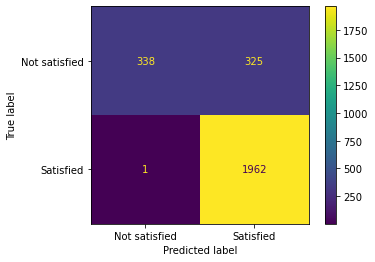

In [29]:
#모델 시각화(by.confusion matrix)
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])

In [40]:
#첫 트리만을 조사하여 적절한 gain, gamma 등에 대한 인사이트를 얻어보기
clf_xgb = xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5,
                           n_estimators=1) # 하나의 첫 트리로 고정
clf_xgb.fit(X_train,y_train)

#첫 트리의 weight, gain, cover 뽑아보기

bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))
    
node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params = {'shape' : 'box',
              'style': 'filled',
               'fillcolor': '#e48038'}


[19:43:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


weight:  {'select_reason': 1, 'companion_num': 1, 'accom_cost': 1}
gain:  {'select_reason': 3067.11133, 'companion_num': 2.22167969, 'accom_cost': 2.22265625}
cover:  {'select_reason': 4428.25, 'companion_num': 4199.75, 'accom_cost': 4198.5}
total_gain:  {'select_reason': 3067.11133, 'companion_num': 2.22167969, 'accom_cost': 2.22265625}
total_cover:  {'select_reason': 4428.25, 'companion_num': 4199.75, 'accom_cost': 4198.5}


In [43]:
import graphviz

In [47]:
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [45]:
!pip install graphviz